# 1. Import the necessary libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
sns.set(style="darkgrid")
%matplotlib inline

# 2. Read the data as a data frame

In [40]:
dfins = pd.read_csv("insurance.csv")   
dfins.head(6) 

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160


# 3. Perform basic EDA which should include the following and print out your insights at every step.

# a. Shape of the data

In [11]:
dfins.shape

(1338, 7)

# b. Data type of each attribute

In [41]:
dfins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
age         1338 non-null int64
sex         1338 non-null object
bmi         1338 non-null float64
children    1338 non-null int64
smoker      1338 non-null object
region      1338 non-null object
charges     1338 non-null float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.2+ KB


# c. Checking the presence of missing values

In [15]:
dfins.isnull().values.any()

False

# d. 5 point summary of numerical attributes

In [16]:
dfins.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# e. Distribution of ‘bmi’, ‘age’ and ‘charges’ columns.

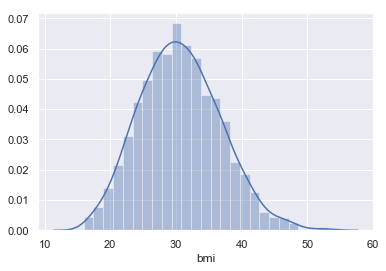

In [17]:
sns.distplot(dfins['bmi'])

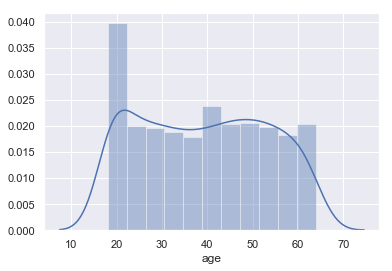

In [18]:
sns.distplot(dfins['age'])

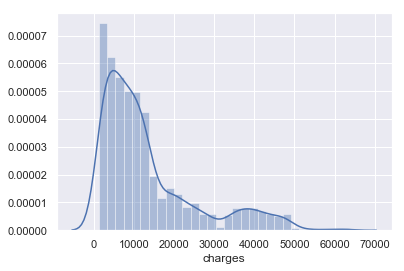

In [14]:
sns.distplot(dfins['charges'])

# f. Measure of skewness of ‘bmi’, ‘age’ and ‘charges’ columns

In [21]:
dfins.skew()

age         0.055673
bmi         0.284047
children    0.938380
charges     1.515880
dtype: float64

# g. Checking the presence of outliers in ‘bmi’, ‘age’ and ‘charges columns

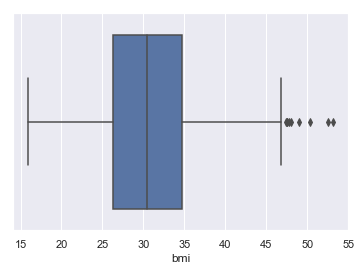

In [23]:
sns.boxplot(dfins['bmi'])

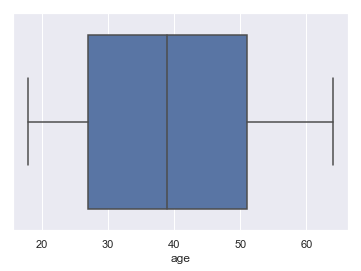

In [24]:
sns.boxplot(dfins['age'])

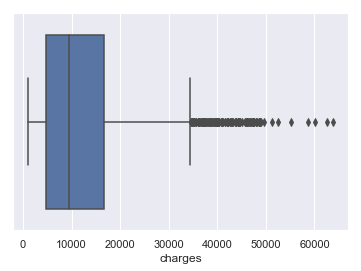

In [25]:
sns.boxplot(dfins['charges'])

# h. Distribution of categorical columns (include children)

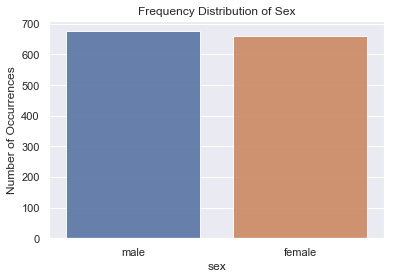

In [26]:
sex_count = dfins['sex'].value_counts()
sns.set(style="darkgrid")
sns.barplot(sex_count.index, sex_count.values, alpha=0.9)
plt.title('Frequency Distribution of Sex')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('sex', fontsize=12)
plt.show()

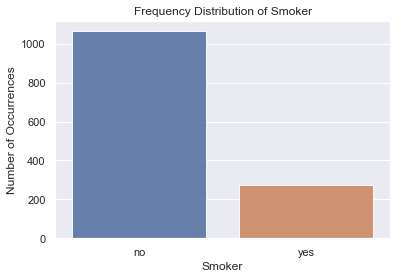

In [28]:
smoker_count = dfins['smoker'].value_counts()
sns.set(style="darkgrid")
sns.barplot(smoker_count.index, smoker_count.values, alpha=0.9)
plt.title('Frequency Distribution of Smoker')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Smoker', fontsize=12)
plt.show()

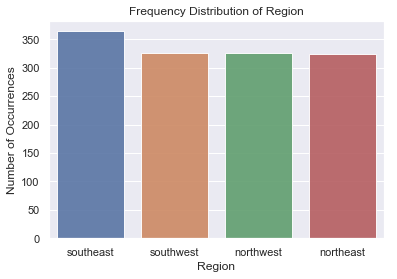

In [29]:
region_count = dfins['region'].value_counts()
sns.set(style="darkgrid")
sns.barplot(region_count.index, region_count.values, alpha=0.9)
plt.title('Frequency Distribution of Region')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Region', fontsize=12)
plt.show()

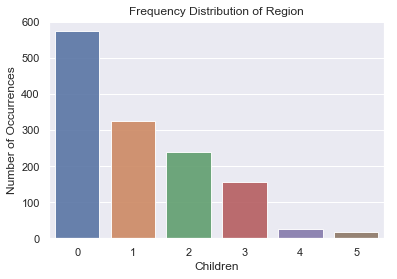

In [31]:
children_count = dfins['children'].value_counts()
sns.set(style="darkgrid")
sns.barplot(children_count.index, children_count.values, alpha=0.9)
plt.title('Frequency Distribution of Region')
plt.ylabel('Number of Occurrences', fontsize=12)
plt.xlabel('Children', fontsize=12)
plt.show()

# i. Pair plot that includes all the columns of the data frame

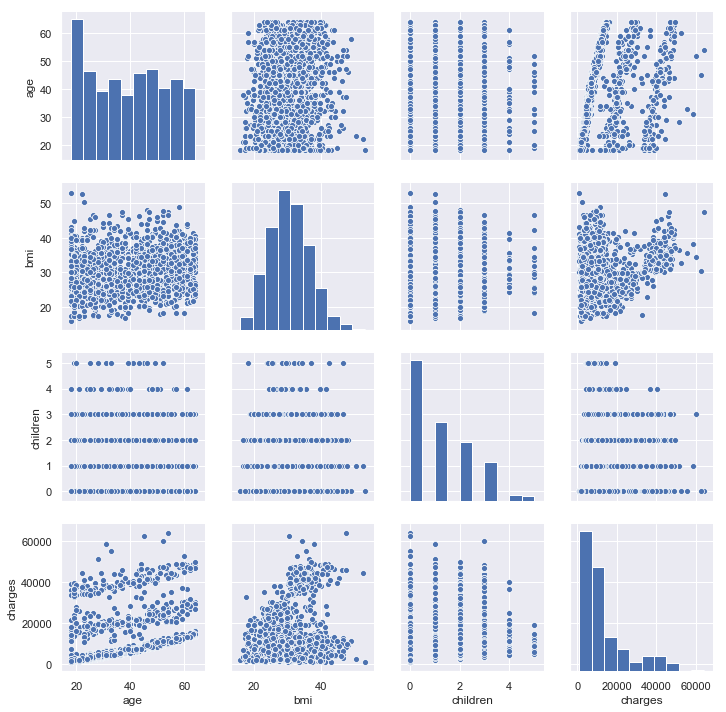

In [6]:
sns.pairplot(dfins)

In [10]:
corr = dfins.corr()
corr

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


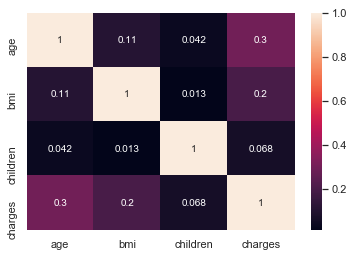

In [11]:
sns.heatmap(corr, annot=True)

# 4. Answer the following questions with statistical evidence

# a. Do charges of people who smoke differ significantly from the people who don't?

#H0 - There is no difference of charges between smoking and non-smoking.

#H1 - There is a significant difference of the charges between smoking and non-smoking.

In [9]:
dfins_mod = dfins.copy()

dfins_mod['smoker'] = dfins_mod['smoker'].mask(dfins['smoker'] == 'yes',1)
dfins_mod['smoker'] = dfins_mod['smoker'].mask(dfins['smoker'] == 'no',0)


In [10]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(dfins_mod['smoker'] , dfins['charges'])

print("Tstatistic , Pvalue", stat, pvalue)
if pvalue > 0.05:
	print('There is no difference of charges between smoking and non-smoking (fail to reject H0)')
else:
	print('There is a significant difference of the charges between smoking and non-smoking (reject H0)')

Tstatistic , Pvalue -40.08312294525875 1.5354226097474645e-275
There is a significant difference of the charges between smoking and non-smoking (reject H0)


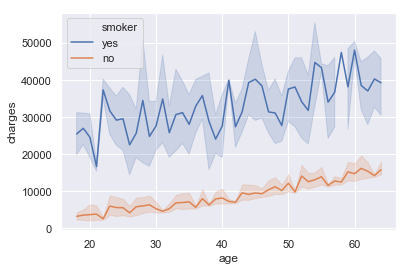

In [8]:
sns.lineplot(y = 'charges',x ='age', hue ='smoker', data=dfins)

Find: There is a significant difference of the charges between smoking and non-smoking

# b. Does bmi of males differ significantly from that of females?


#H0 - There is no difference of BMI between Gents and Ladies.

#H1 - There is a significant difference of the BMI between Gents and Ladies.

In [11]:
dfins_bmi = dfins.copy()

dfins_bmi['sex'] = dfins_bmi['sex'].mask(dfins['sex'] == 'female',1)
dfins_bmi['sex'] = dfins_bmi['sex'].mask(dfins['sex'] == 'male',2)

In [14]:
from scipy.stats import ttest_ind

stat, pvalue = ttest_ind(dfins_bmi['sex'] , dfins['bmi'])

print("Tstatistic , Pvalue", stat, pvalue)
if pvalue > 0.05:
	print('There is a significant difference of the BMI between Male and Female (H0)')
else:
	print('There is no difference of BMI between Male and Female (reject H0)')

Tstatistic , Pvalue -174.31376283574707 0.0
There is no difference of BMI between Male and Female (reject H0)


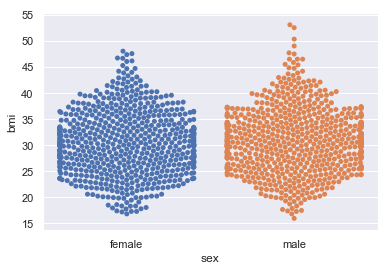

In [21]:
sns.swarmplot(x = 'sex', y='bmi' ,data=dfins)

Find: There is no difference of BMI between Male and Female. Also the p value is 0.

# c. Is the proportion of smokers significantly different in different genders?

#H0 - There is no difference of Smokers between Gents and Ladies.

#H1 - There is a significant difference of the Smokers between Gents and Ladies.

Since we are dealing with the categorical varibles, of Smokers and Gender. , used Chi-Square testing.

In [22]:
from scipy.stats import chisquare,chi2_contingency

chisquare(dfins["smoker"].value_counts())
chisquare(dfins["sex"].value_counts())

Power_divergenceResult(statistic=0.14648729446935724, pvalue=0.7019150843224216)

In [24]:
cont = pd.crosstab(dfins["smoker"],
                   dfins["sex"])
cont

sex,female,male
smoker,,
no,547,517
yes,115,159


In [25]:
print(chi2_contingency(cont))

if pvalue > 0.05:
	print('There is no difference of smokers between Male and Female (fail to reject H0)')
else:
	print('There is a difference of the smokers between Male and Female (reject H0)')

(7.39291081459996, 0.006548143503580696, 1, array([[526.43348281, 537.56651719],
       [135.56651719, 138.43348281]]))
There is a difference of the smokers between Male and Female (reject H0)


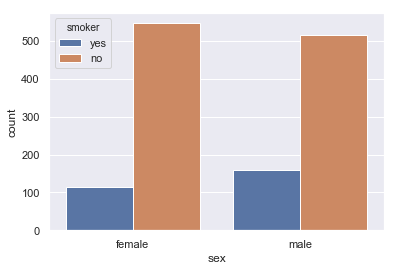

In [26]:
sns.countplot(x='sex',hue='smoker', data=dfins)

Find: There is a difference of the smokers between Male and Female but not sugnificantly large.

# d. Is the distribution of bmi across women with no children, one child and two children, the same ?

#H0 - There is no difference  BMI on Women who had No Child, 1-Child, 2- Children

#H1 - There is a significant difference on BMI on Women who had No Child, 1-Child, 2- Children

In [ ]:
from statsmodels.formula.api import ols
from statsmodels.stats.anova import _get_covariance, anova_lm

In [42]:
dfins = pd.get_dummies(dfins,columns=['sex'])

In [43]:
dfins.head(1)

,age,bmi,children,smoker,region,charges,sex_female,sex_male
0,19,27.9,0,yes,southwest,16884.924,1,0


In [29]:
dfins['children'] = dfins['children'].replace({0:'NoChild', 1: 'OneChild', 2:'TwoChild',3:'ThreeChild', 4: 'FourChild',5:'FiveChild' })

In [30]:
dfins = pd.get_dummies(dfins,columns=['children'])

In [31]:
dfins.head(1)

,age,sex,bmi,smoker,region,charges,children_FiveChild,children_FourChild,children_NoChild,children_OneChild,children_ThreeChild,children_TwoChild
0,19,female,27.9,yes,southwest,16884.924,0,0,1,0,0,0


In [32]:
dfins.children_OneChild = pd.Categorical(dfins.children_OneChild)

In [33]:
dfins.children_NoChild = pd.Categorical(dfins.children_NoChild)

In [34]:
dfins.children_TwoChild = pd.Categorical(dfins.children_TwoChild)

In [37]:
dfins.sex_female = pd.Categorical(dfins.sex_female)

In [38]:
formula = 'bmi ~ C(sex_female)+ C(children_NoChild)+ C(children_OneChild)+ C(children_TwoChild)'
model = ols(formula,dfins).fit()
aov_table = anova_lm(model)
print(aov_table)

                          df        sum_sq     mean_sq         F    PR(>F)
C(sex_female)            1.0    106.912532  106.912532  2.874313  0.090237
C(children_NoChild)      1.0     11.765497   11.765497  0.316312  0.573927
C(children_OneChild)     1.0      8.866519    8.866519  0.238374  0.625463
C(children_TwoChild)     1.0     10.583689   10.583689  0.284539  0.593830
Residual              1333.0  49582.072149   37.195853       NaN       NaN


The F Value is positive and P > 0.05, So fail to reject Null Hupothesis. 
Find : There is no difference  BMI on Women who had No Child, 1-Child, 2- Children.